In [ ]:
import csv
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from neupy import algorithms
from numpy import interp
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [ ]:
random_state = np.random.RandomState(5)
inputSize = 210
outputCol = inputSize + 1

# 10 Fold Part
print('\nk-fold Cross-Validation')
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
dataset = np.genfromtxt("./FVs.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]
Y = dataset[:, inputSize:outputCol]
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
cvscores = []
shape_X=X.shape
shape_Y=Y.shape
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))

# Classification 

In [4]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, shuffle=True)
#classifier = BernoulliNB()
 #clf = algorithms.PNN(std=10, verbose=False)
# classifier = AdaBoostClassifier(n_estimators=100)
#classifier = SVC(kernel='linear', probability=True)
#classifier = KNeighborsClassifier(n_neighbors=150)
#clf = RandomForestClassifier(n_estimators=3, oob_score=True, random_state=29, warm_start=False)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9#, 2), random_state=1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


# Independent testing


Independent testing
training dataset 70%
(800, 210) (800, 1)
testing dataset 30%
(344, 210) (344, 1)

Independent training data set confusion matrix
['True Negative =', 394, 'False Positive =', 8, 'False Negative =', 0, 'True Positive =', 398, 'Accuracy =', 99.0]
['Accuracy =', 99.0, 'Sensitivity =', 1.0, 'Precession =', 1.0, 'MCC =', 1.0]

Independent testing  data set confusion matrix
['True Negative =', 169, 'False Positive =', 1, 'False Negative =', 2, 'True Positive =', 172, 'Accuracy =', 99.13]
['Accuracy =', 99.13, 'Sensitivity =', 1.0, 'Precession =', 1.0, 'MCC =', 1.0]


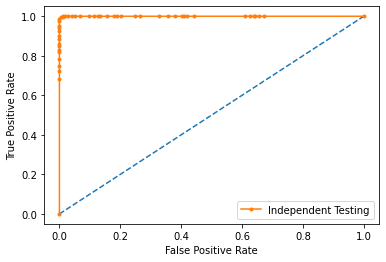

In [5]:
from sklearn.model_selection import train_test_split
print('\nIndependent testing')
# resultwriter.writerow(['\n\rindependent testing'])
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
# train dataset
print("training dataset 70%")
print(X_train.shape, y_train.shape)
# test dataset
print("testing dataset 30%")
print(X_test.shape, y_test.shape)
# train the model
std_scale = StandardScaler().fit(X_train)
X_train = np.array(X_train, dtype='float32')
X_train = std_scale.transform(X_train)
# X_train = std_scale.transform(X_train)
# X_train = np.array(X_train,dtype='float32')
X_train = X_train[:, ~np.isnan(X_train).any(axis=0)]
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
clf = RandomForestClassifier(n_estimators=25, max_depth=16, oob_score=True, n_jobs=-1, warm_start=True).fit(X_train, y_train.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train.ravel()) 
pred = np.round(clf.predict(X_train)) #clf
tn, fp, fn, tp = confusion_matrix(y_train, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=np.round(tp/(tp+fn))
sp=np.round(tn/(tn+fp))
prec=np.round(tp/(tp+fp))
mcc=np.round((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
print("\nIndependent training data set confusion matrix")
print(
    (['True Negative =', tn, 'False Positive =', fp, 'False Negative =', fn, 'True Positive =', tp, 'Accuracy =', acc]))
print(
    (['Accuracy =', acc, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc]))
# now test the model
std_scale = StandardScaler().fit(X_test)
X_test = std_scale.transform(X_test)
pca = PCA(n_components=2)
pca.fit(X_test)
X_test = pca.transform(X_test)
clf = RandomForestClassifier(n_estimators=25, max_depth=12, oob_score=True, n_jobs=-1, warm_start=True).fit(X_test, y_test.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X_test, y_test.ravel())
pred_test = np.round(clf.predict(X_test)) # clf
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, pred_test, labels=[1, 0]).ravel()
acc1 = np.round(((tn1 + tp1) / (tn1 + fp1 + fn1 + tp1)) * 100, 2)
sn1=np.round(tp1/(tp1+fn1))
sp1=np.round(tn/(tn1+fp1))
prec1=np.round(tp1/(tp1+fp1))
mcc1=np.round((tp1*tn1-fp1*fn1)/(math.sqrt((tp1+fp1)*(tp1+fn1)*(tn1+fn1)*(tn1+fn1))))
print("\nIndependent testing  data set confusion matrix")
print((['True Negative =', tn1, 'False Positive =', fp1, 'False Negative =', fn1, 'True Positive =', tp1, 'Accuracy =',
        acc1]))
print(
    (['Accuracy =', acc1, 'Sensitivity =', sn1, 'Precession =', prec1, 'MCC =', mcc1]))
with open('./result2.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Independent testing'])
    resultwriter.writerow(['training dataset 70%'])
    resultwriter.writerow([X_train.shape, y_train.shape])
    resultwriter.writerow(['testing dataset 30%'])
    resultwriter.writerow([X_test.shape, y_test.shape])
    resultwriter.writerow(["training data set confusion matrix"])
    resultwriter.writerow((
                          ['True Negative =', tn, 'False Positive =', fp, 'False Negative =', fn, 'True Positive =', tp,
                           'Accuracy =', acc]))
    resultwriter.writerow((['testing  data set confusion matrix']))
    resultwriter.writerow((['True Negative =', tn1, 'False Positive =', fp1, 'False Negative =', fn1, 'True Positive =',
                            tp1, 'Accuracy =', acc1]))

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(y_test))]
lr_probs1 = clf.predict_proba(X_test) #clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _ = roc_curve(y_test, ns_probs1)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs1)

# plot the roc curve for the model
pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='Independent Testing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


# K fold Validation


k-fold Cross-Validation
Fold : 0
[46, 0, 57, 12, 89.57, 100.0, 79.31, 0.80943]
Fold : 1
[58, 0, 57, 0, 100.0, 100.0, 100.0, 1.0]
Fold : 2


C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


[57, 0, 58, 0, 100.0, 100.0, 100.0, 1.0]
Fold : 3
[55, 0, 58, 2, 98.26, 100.0, 96.49, 0.96579]
Fold : 4
[55, 0, 57, 2, 98.25, 100.0, 96.49, 0.96551]
Fold : 5

C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "



[57, 2, 55, 0, 98.25, 96.49, 100.0, 0.96551]
Fold : 6
[54, 0, 57, 3, 97.37, 100.0, 94.74, 0.94868]
Fold : 7


C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


[57, 1, 56, 0, 99.12, 98.25, 100.0, 0.98261]
Fold : 8
[57, 0, 57, 0, 100.0, 100.0, 100.0, 1.0]
Fold : 9
[57, 1, 56, 0, 99.12, 98.25, 100.0, 0.98261]


C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


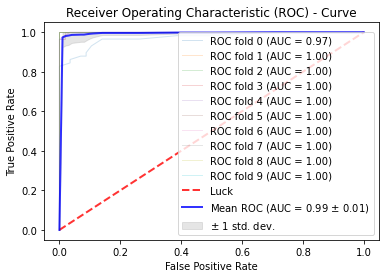



Results are Saved in Cross-Validation-Results-5.csv


In [6]:
# 10 Fold Part
print('\nk-fold Cross-Validation')
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
dataset = np.genfromtxt("./FVs.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]
Y = dataset[:, inputSize:outputCol]
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
cvscores = []

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
#cv = StratifiedKFold(n_splits=10, shuffle=True)
# classifier = BernoulliNB()
# classifier = algorithms.PNN(std=10, verbose=False)
# classifier = AdaBoostClassifier(n_estimators=100)
# classifier = SVC(kernel='linear', probability=True)
#classifier = KNeighborsClassifier(n_neighbors=500)
classifier = RandomForestClassifier(n_estimators=25, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    print('Fold : ' + str(i))
    classifier.fit(X[train], Y[train].ravel())
    pred = np.round(classifier.predict(X[test]))
    tp, fn, fp, tn = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sp = np.round((tn / (fp + tn)) * 100, 2)
    sn = np.round((tp / (tp + fn)) * 100, 2)
    mcc = np.round(matthews_corrcoef(Y[test].ravel(), pred), 5)
    cvscores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
    print([tp, fp, tn, fn, acc, sp, sn, mcc])
    probas_ = classifier.predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = metrics.roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.2,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Curve')
plt.legend(loc="lower right")
# plt.legend('')
plt.show()

print('\n\nResults are Saved in Cross-Validation-Results-5.csv')
with open('./Cross-Validation-Results.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['10-Fold Cross-Validation'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    for i in range(cvscores.__len__()):
        resultwriter.writerow(cvscores[i])


# Self Consistency



Self-Consistency
[560, 12, 2, 570, 98.78, 0.9965034965034965, 'Accuracy =', 98.78, 'specificity=', 0.9790209790209791, 'Sensitivity =', 0.9965034965034965, 'Precession =', 0.979381443298969, 'MCC =', 0.9843156846095926]


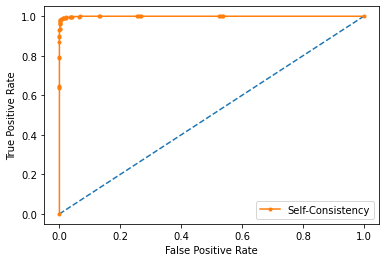

98.78

In [7]:
import matplotlib.pyplot as pyplot
print('\nSelf-Consistency')
clf = RandomForestClassifier(n_estimators=16, max_depth=40, oob_score=True, n_jobs=-1, warm_start=True).fit(X, Y.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X, Y.ravel())
pred = np.round(clf.predict(X)) # clf
tn, fp, fn, tp = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=(tp/(tp+fn))
sp=(tn/(tn+fp))
prec=(tp/(tp+fp))
mcc=((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
print([tn, fp, fn, tp, acc, sn, 'Accuracy =', acc, 'specificity=', sp, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc ])
ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X) # clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
ns_fpr1, ns_tpr1, _ = roc_curve(Y, ns_probs1)
lr_fpr1, lr_tpr1, _ = roc_curve(Y, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Self-Consistency')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
acc

# JackKnife

In [ ]:
kfold = KFold(n_splits=20, shuffle=False)  # Removed Stratified Keyword for JackKnife
cvscores = []
iterator = 1
cv_score = 0

# Normalization
std_scale = StandardScaler().fit(X)
X = np.array(X, dtype='float64')
#X = std_scale.transform(X)
# pca = decomposition.PCA(n_components=2)
# pca.fit(X)
# X = pca.transform(X)
print('\nJacknife testing')
for train, test in kfold.split(X, Y):
    print('\nJacknife : ' + str(iterator))
    clf = RandomForestClassifier(n_estimators=30, max_depth=25, oob_score=True, n_jobs=-1, warm_start=False).fit(X, Y.ravel())
    #clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X, Y.ravel())
    pred = np.round(clf.predict(X[test]))
    tn2, fp2, fn2, tp2 = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc2 = np.round(((tn2 + tp2)/ (tn2 + fp2 + fn2 + tp2)) * 100, 2)
    sn2=np.round(tp2/(tp2+fn2))
    sp2=np.round(tn2/(tn2+fp2))
    prec2=np.round(tp2/(tp2+fp2))
    mcc2=np.round((tp2*tn2-fp2*fn2)/(math.sqrt((tp2+fp2)*(tp2+fn2)*(tn2+fn2)*(tn2+fn2))))
    cvscores.append([tn2, fp2, fn2, tp2, acc2, sn2, sp2, prec2, mcc2])
    iterator = iterator + 1
    print([tn2, fp2, fn2, tp2, 'Accuracy =', acc2, 'Sensitivity =', sn2, 'specificity=', sp2, 'Precession =', prec2, 'MCC =', mcc2])
    cv_score = cv_score + acc2
print('\n\rFinal Jacknife Score = ', np.round(cv_score / kfold.n_splits, 2))
with open('./result3.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['\nJacknife'])
    resultwriter.writerow(['True Negative' 'False Positive' 'False Negative' 'True Positive' 'Accuracy'])
    for i in range(cvscores.__len__()):
        resultwriter.writerow(cvscores[i])
    resultwriter.writerow(['The Final Jacknife Score', '', '', '', np.round(cv_score / kfold.n_splits, 2)])

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X)#clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _ = roc_curve(Y, ns_probs1)
lr_fpr4, lr_tpr4, _ = roc_curve(Y, lr_probs1)

# plot the roc curve for the model
pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label='Jacknife Testing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--', )
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='purple', label='Self-Consistency')

# plot the roc curve for the model
ns_fpr2, ns_tpr2, _ = roc_curve(y_test, ns_probs1) # this is needed to be check as I suppose to be true but needed verification
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--', color='Blue')
pyplot.plot(lr_fpr2, lr_tpr2, linestyle='-', color='Green', label='10-fold Cross Validation')

# plot the roc curve for the model
pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='Cyan', label='Independent Testing')

# plot the roc curve for the model
pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='yellow', label='Jacknife Testing')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()